# Topic Modeling of Episode Descriptions

## Install required Modules

In [1]:
!pip install top2vec
!pip install scikit-learn
!pip install pandas
!pip install torch
!pip install tensorflow
!pip install bertopic
!pip install sentence-transformers
!pip install spacy
!pip install gensim
!pip install pyldavis
!pip install tf-keras

# Import Dataframe

In [1]:
import pandas as pd

PATH_TO_RAW_DATA : str = "../../data/episodes_descriptions.json"
PATH_TO_CLEAN_DATA : str = "../../data/episodes_description.csv"
df = pd.read_csv(PATH_TO_CLEAN_DATA)

df


,Unnamed: 0,title,text
0,0,Pilot,middle night obviously drunk rick bursts morty...
1,1,Lawnmower Dog,jerry complains family dog snuffles stupid r...
2,2,Anatomy Park (Episode),"christmas jerry tries enforce idea "" human hol..."
3,3,M. Night Shaym-Aliens!,episode opens rick dissecting large rat garage...
4,4,Meeseeks and Destroy,mr meeseeks existing solve beth ’s problemafte...
...,...,...,...
76,76,Mercy Kill,planet dorian 5 supernova vance slaughtering i...
77,77,Girls Night,bar calypso diablo verde lady katana supernova...
78,78,Kintsugi,""" unknown planet somber alan rails puts togeth..."
79,79,Little Trains,doom nomitron arrives destroy earth satellite ...


## Replace Frequent Character names

In [2]:
df["text"] = df["text"].apply(lambda x: x.replace("rick" , "").replace("morty", "").replace("summer","").replace("jerry" ,"").replace("beth",""))
df

,Unnamed: 0,title,text
0,0,Pilot,middle night obviously drunk bursts ’s room ...
1,1,Lawnmower Dog,complains family dog snuffles stupid gives...
2,2,Anatomy Park (Episode),"christmas tries enforce idea "" human holiday ..."
3,3,M. Night Shaym-Aliens!,episode opens dissecting large rat garage com...
4,4,Meeseeks and Destroy,mr meeseeks existing solve ’s problemafter pa...
...,...,...,...
76,76,Mercy Kill,planet dorian 5 supernova vance slaughtering i...
77,77,Girls Night,bar calypso diablo verde lady katana supernova...
78,78,Kintsugi,""" unknown planet somber alan rails puts togeth..."
79,79,Little Trains,doom nomitron arrives destroy earth satellite ...


In [3]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import spacy

In [4]:
import spacy
def lemmatize(docs, allowed_postags :list[str] = ["NOUN",  "ADJ", "VERB", "ADV"]) -> list:
  '''
  Performs lemmization of input documents.
  Args:
    - docs: list of strings with input documents
    - allowed_postags: list of accepted Part of Speech (POS) types
  Output:
    - list of strings with lemmatized input
  '''
  nlp = spacy.load("en_core_web_sm", disable = ["parser", "ner"])
  lemmatized_docs = []
  for doc in docs:
    doc = nlp(doc)
    tokens = []
    for token in doc:
      if token.pos_ in allowed_postags:
        tokens.append(token.lemma_)
    lemmatized_docs.append(" ".join(tokens))
  return (lemmatized_docs)

In [5]:

def tokenize(docs) -> list:
  '''
  Performs tokenization of input documents.
  Args:
    - docs: list of strings with input documents
  Output:
    - list of strings with tokenized input
  '''
  tokenized_docs = []
  for doc in docs:
    tokens = gensim.utils.simple_preprocess(doc, deacc=True)
    tokenized_docs.append(tokens)
  return (tokenized_docs)


In [6]:
def document_extractor (docs : list) -> list:
    output = []

    for doc in docs:
        n = 300
        [output.append(doc[i:i+n]) for i in range(0, len(doc), n)]

    return output
        

## Create episode no. Column and filter on Season 7

In [7]:
df = df.rename(columns={"Unnamed: 0" : "episode no."})
df["episode no."] = df["episode no."].apply(lambda x: int(x) + 1)
df = df[(df["episode no."] <= 71)] # Herausfiltern der Falschen
df

,episode no.,title,text
0,1,Pilot,middle night obviously drunk bursts ’s room ...
1,2,Lawnmower Dog,complains family dog snuffles stupid gives...
2,3,Anatomy Park (Episode),"christmas tries enforce idea "" human holiday ..."
3,4,M. Night Shaym-Aliens!,episode opens dissecting large rat garage com...
4,5,Meeseeks and Destroy,mr meeseeks existing solve ’s problemafter pa...
...,...,...,...
66,67,Rickfending Your Mort,finds drunken stupor floor garage still depr...
67,68,Wet Kuat Amortican Summer,"’s chores ( including cleaning another "" ’s ..."
68,69,Rise of the Numbericons: The Movie,"episode starts exact way post credits scene "" ..."
69,70,Mort: Ragnarick,white void golden light appear front nana com...


### Split Dataframes into seasons

In [8]:
seasons_splitter = [(1,11) , (12,20) , (21,30) , (31,40) , (41,50) , (51, 70)]
seasons_dfs : list[pd.DataFrame]= []

for splitter in seasons_splitter:
    seasons_dfs.append(df[(df["episode no."] >= splitter[0]) &  (df["episode no."] <= splitter[1])])

seasons_dfs[2]

,episode no.,title,text
20,21,The Wedding Squanchers,eating breakfast telling get job knoc...
21,22,The Rickshank Rickdemption,episode starts family sitting booth old fashi...
22,23,Rickmancing the Stone,wearing fall portal back garage another ad...
23,24,Pickle Rick,guess needing preparing school advised therap...
24,25,Vindicators 3: The Return of Worldender,start garage cleaning multiple worm like cre...
25,26,The Whirly Dirly Conspiracy,episode begins wallowing lonely new life prep...
26,27,Rest and Ricklaxation,episode begins school hears jessica broke bra...
27,28,The Ricklantis Mixup,prepare go atlantis interrupted pair looki...
28,29,Morty's Mind Blowers,episode starts run strange humanoid creature...
29,30,The ABC's of Beth,learning news convicted child murderer joseph ...


## BERTopic (for All)

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN

docs = df["text"]
docs = document_extractor(docs)
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")


cluster_model = HDBSCAN(min_cluster_size = 5, 
                        metric = 'euclidean', 
                        cluster_selection_method = 'eom', 
                        prediction_data = True)


topic_model = BERTopic(embedding_model = embedding_model,
                       hdbscan_model = cluster_model)


topics, probs = topic_model.fit_transform(docs)

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart(top_n_topics = 20)

 ## MNF (for All)

In [19]:
'''
Topic Modeling with NMF: Minimum Viable Example
References:
[1] https://radimrehurek.com/gensim/models/nmf.html
'''

# Import dependencies
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import spacy
import pyLDAvis
import pyLDAvis.gensim_models
from sklearn.datasets import fetch_20newsgroups
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


def lemmatize(docs, allowed_postags = ["NOUN", "ADJ"]):
  '''
  Performs lemmization of input documents.
  Args:
    - docs: list of strings with input documents
    - allowed_postags: list of accepted Part of Speech (POS) types
  Output:
    - list of strings with lemmatized input
  '''
  nlp = spacy.load("en_core_web_sm", disable = ["parser", "ner"])
  lemmatized_docs = []
  for doc in docs:
    doc = nlp(doc)
    tokens = []
    for token in doc:
      if token.pos_ in allowed_postags:
        tokens.append(token.lemma_)
    lemmatized_docs.append(" ".join(tokens))
  return (lemmatized_docs)


def tokenize(docs):
  '''
  Performs tokenization of input documents.
  Args:
    - docs: list of strings with input documents
  Output:
    - list of strings with tokenized input
  '''
  tokenized_docs = []
  for doc in docs:
    tokens = gensim.utils.simple_preprocess(doc, deacc=True)
    tokenized_docs.append(tokens)
  return (tokenized_docs)


# Fetch 20newsgropus dataset
docs = df["text"]

# Pre-process input: lemmatization and tokenization
lemmatized_docs = lemmatize(docs)
tokenized_docs = tokenize(lemmatized_docs)

# Mapping from word IDs to words
id2word = corpora.Dictionary(tokenized_docs)

# Prepare Document-Term Matrix
corpus = []
for doc in tokenized_docs:
    corpus.append(id2word.doc2bow(doc))

# Fit NMF model: See [1] for more details
nmf_model = gensim.models.Nmf(
    corpus = corpus,     # Document-Term Matrix
    id2word = id2word,   # Map word IDs to words
    num_topics = 10,     # Number of latent topics to extract
    random_state = 100,
    passes = 100,        # N° of passes through the corpus during training
    )

# Get the topics sorted by sparsity
nmf_model.show_topics()

[(0,
  '0.108*"snake" + 0.038*"time" + 0.019*"slippy" + 0.015*"planet" + 0.014*"robot" + 0.013*"travel" + 0.012*"machine" + 0.011*"instruction" + 0.010*"space" + 0.009*"light"'),
 (1,
  '0.044*"story" + 0.037*"man" + 0.033*"train" + 0.017*"conductor" + 0.010*"car" + 0.010*"woman" + 0.010*"narrative" + 0.009*"first" + 0.009*"space" + 0.007*"ticket"'),
 (2,
  '0.064*"fortune" + 0.030*"cookie" + 0.019*"mother" + 0.015*"factory" + 0.013*"zoo" + 0.011*"sex" + 0.011*"old" + 0.011*"mom" + 0.011*"lockerean" + 0.010*"man"'),
 (3,
  '0.061*"memory" + 0.049*"birdperson" + 0.015*"mind" + 0.014*"garage" + 0.013*"parasite" + 0.009*"spaghetti" + 0.008*"people" + 0.008*"planet" + 0.008*"battle" + 0.008*"federation"'),
 (4,
  '0.087*"hole" + 0.086*"fear" + 0.043*"diane" + 0.022*"man" + 0.013*"reality" + 0.012*"great" + 0.010*"time" + 0.010*"theory" + 0.010*"portal" + 0.008*"young"'),
 (5,
  '0.036*"family" + 0.012*"space" + 0.010*"earth" + 0.009*"decoy" + 0.009*"prime" + 0.007*"dimension" + 0.007*"nigh

## LDA (for All)

In [58]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import spacy
import pyLDAvis
import pyLDAvis.gensim_models
from sklearn.datasets import fetch_20newsgroups
import warnings

In [83]:
corpus = []

tokenized_docs = tokenize(df["text"])
id2word = corpora.Dictionary(tokenized_docs)
for doc in tokenized_docs:
    corpus.append(id2word.doc2bow(doc))


topic_model = gensim.models.ldamodel.LdaModel(
    corpus = corpus,      # Document-Term Matrix
    id2word = id2word,    # Map word IDs to words
    num_topics = 15,      # Number of latent topics to extract
    random_state = 100,
    passes = 100,         # N° of passes through the corpus during training
    )

# Visualize with pyLDAvis: See [2] for more details
pyLDAvis.enable_notebook()
visualization = pyLDAvis.gensim_models.prepare(
    topic_model, 
    corpus,
    id2word, 
    mds = "mmds", 
    R = 30)

visualization

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.117260  0.023541       1        1  14.912232
5     -0.194843  0.081130       2        1  13.645430
4     -0.133376 -0.126261       3        1  12.645536
1     -0.070187 -0.192244       4        1  11.735752
13     0.116336 -0.154825       5        1   8.954023
14     0.034117 -0.221333       6        1   6.919216
12     0.100238  0.193012       7        1   6.748279
2     -0.223943 -0.056605       8        1   6.013477
7     -0.016683  0.025996       9        1   5.468069
10    -0.100454  0.177109      10        1   4.807231
9      0.004109  0.191556      11        1   2.811593
8      0.111804 -0.061961      12        1   2.290832
11     0.194371 -0.013737      13        1   1.523134
6      0.186666  0.080888      14        1   1.511616
0      0.109106  0.053735      15        1   0.013580, topic_info=           Term       Freq      Total Category  logprob  loglift
253          mr  92.000000  92.000000  Default  30.0000  30.0000
1416      prime  43.000000  43.000000  Default  29.0000  29.0000
2800      snake  53.000000  53.000000  Default  28.0000  28.0000
901       water  41.000000  41.000000  Default  27.0000  27.0000
297      portal  78.000000  78.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
1058       kill   0.000621  71.641340  Topic15  -8.9368  -2.7517
1091     people   0.000621  66.254126  Topic15  -8.9368  -2.6736
2791  president   0.000621  91.268409  Topic15  -8.9368  -2.9939
6259  dinosaurs   0.000621  24.829947  Topic15  -8.9368  -1.6921
2     activates   0.000621  11.900077  Topic15  -8.9368  -0.9566

[952 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
6393     13  0.812668   abandoning
4742     10  0.887527  abomination
1865      4  0.380073      abusive
1865     13  0.380073      abusive
6437     11  0.490744   accelerate
...     ...       ...          ...
3294      1  0.094978          zoo
3294      2  0.094978          zoo
3294      3  0.094978          zoo
3294      8  0.569870          zoo
3294     11  0.094978          zoo

[2350 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 5, 2, 14, 15, 13, 3, 8, 11, 10, 9, 12, 7, 1])

In [80]:
topic_model.print_topics(num_topics=15)

[(0,
  '0.000*"family" + 0.000*"back" + 0.000*"one" + 0.000*"time" + 0.000*"get" + 0.000*"two" + 0.000*"kill" + 0.000*"mr" + 0.000*"like" + 0.000*"people"'),
 (1,
  '0.008*"mr" + 0.006*"tony" + 0.006*"planet" + 0.006*"tells" + 0.006*"spaghetti" + 0.005*"app" + 0.005*"meeseeks" + 0.005*"asks" + 0.005*"two" + 0.005*"glootie"'),
 (2,
  '0.012*"zeep" + 0.010*"man" + 0.009*"fortune" + 0.008*"train" + 0.008*"story" + 0.008*"ship" + 0.005*"two" + 0.005*"cookies" + 0.005*"like" + 0.004*"car"'),
 (3,
  '0.014*"time" + 0.010*"snake" + 0.006*"one" + 0.005*"snakes" + 0.004*"back" + 0.004*"two" + 0.004*"device" + 0.004*"tells" + 0.004*"kuato" + 0.004*"go"'),
 (4,
  '0.008*"birdperson" + 0.007*"family" + 0.006*"back" + 0.006*"memory" + 0.006*"federation" + 0.005*"room" + 0.005*"two" + 0.005*"space" + 0.005*"vindicators" + 0.004*"tammy"'),
 (5,
  '0.010*"president" + 0.007*"hole" + 0.007*"fear" + 0.006*"family" + 0.006*"cop" + 0.005*"night" + 0.005*"one" + 0.004*"back" + 0.004*"planet" + 0.004*"unity

In [ ]:
df

In [70]:
def logging_topic_relevance_per_episode(topic_id : int)-> list[float]:
    values = []
    for i in range(df.shape[0]):
        other_texts = tokenize( df[(df["episode no."] == i + 1)]["text"])
        other_corpus = [id2word.doc2bow(text) for text in other_texts]
        values.append(topic_model.get_document_topics(bow=other_corpus , minimum_probability=0.0 ,per_word_topics=True)[0][0][topic_id][1])
    return values

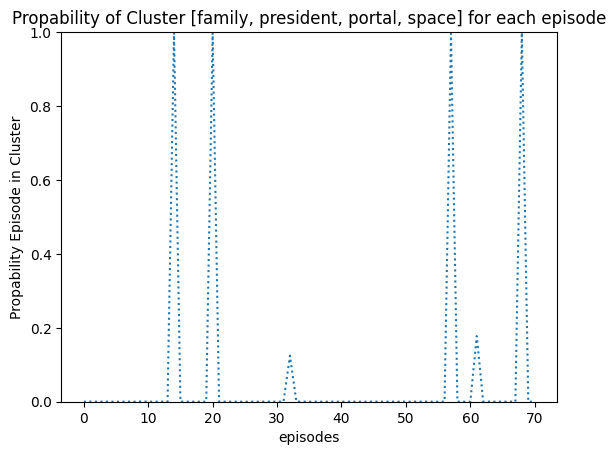

In [82]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array(logging_topic_relevance_per_episode(11))

plt.plot(ypoints, linestyle = 'dotted')
plt.ylabel("Propability Episode in Cluster")
plt.title("Propability of Cluster [family, president, portal, space] for each episode")
plt.xlabel("episodes")
plt.ylim(0,1)
plt.show()

In [65]:
topic_model.get_topic_terms(25 , topn=20)

[(3848, 0.02026428),
 (5195, 0.017888628),
 (5210, 0.016694438),
 (4551, 0.011938707),
 (738, 0.007878947),
 (2015, 0.007770589),
 (5249, 0.007179166),
 (447, 0.00691166),
 (2734, 0.005989225),
 (2677, 0.005406935),
 (791, 0.0053977137),
 (5200, 0.004799282),
 (5250, 0.004799282),
 (5211, 0.004799282),
 (1999, 0.0047725234),
 (2116, 0.004763581),
 (165, 0.0046326397),
 (1058, 0.0043401276),
 (2309, 0.0042835823),
 (400, 0.0042331037)]

In [ ]:
id2word[5076]

# LDA Per Season

In [ ]:
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

seasons_dfs


In [ ]:
vizualisations :list = []

for season_df in seasons_dfs:
    tokenized_docs =  tokenize(season_df["text"])
    id2word = corpora.Dictionary(tokenized_docs)
    corpus = []
    for doc in tokenized_docs:
        corpus.append(id2word.doc2bow(doc))
    
    # Fit LDA model: See [1] for more details
    topic_model = gensim.models.ldamodel.LdaModel(
        corpus = corpus,      # Document-Term Matrix
        id2word = id2word,    # Map word IDs to words
        num_topics = 25,      # Number of latent topics to extract
        random_state = 100,
        passes = 100,         # N° of passes through the corpus during training
        )
    
    # Visualize with pyLDAvis: See [2] for more details
    pyLDAvis.enable_notebook()
    visualization = pyLDAvis.gensim_models.prepare(
        topic_model, 
        corpus,
        id2word, 
        mds = "mmds", 
        R = 30)
    
    vizualisations.append(visualization)

In [ ]:
len(vizualisations)

In [ ]:
vizualisations[0]

In [ ]:
vizualisations[1]

In [ ]:
vizualisations[2]

In [ ]:
vizualisations[3]

In [ ]:
vizualisations[4]